In [1]:
import warnings
warnings.filterwarnings("ignore")

from abipy import abilab
import abipy.flowtk as flowtk

from pprint import pprint
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline   

# Structure

In [70]:
def gs_input(ecut = 30, acell = 5):
    structure = abilab.Structure.from_abivars(
        ntype = 1,
        znucl = 3,
        natom = 1,
        typat = (1),
        acell = (acell, acell, acell),
        rprim = [
            -0.5, 0.5, 0.5,
            0.5, -0.5, 0.5,
            0.5, 0.5, -0.5,
        ],
        xred = [
            0.0, 0.0, 0.0,
        ]
    )
    inp = abilab.AbinitInput(
        structure=structure,
        pseudos="pseudos/Li.psp8"
    )
    # inp = abilab.AbinitInput(
    #     structure=abidata.cif_file("si.cif"),
    #     pseudos=abidata.pseudos("14si.pspnc")
    # )
    inp.set_vars(
        ecut = ecut,
        diemac=12.0,
        toldfe=1e-6,
        iomode=3,
    )
    inp.set_kmesh(
        ngkpt=(4, 4, 4),     
        shiftk = [
            0.5, 0.5, 0.5,
        ]
    )
    return inp

Full Formula (Li1)
Reduced Formula: Li
abc   :   2.291405   2.291405   2.291405
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li      0    0    0


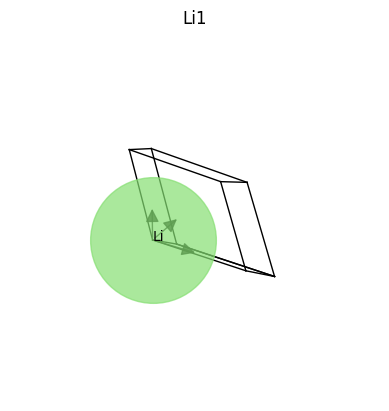

In [71]:
gsinp = gs_input()
print(gsinp.structure)
gsinp.structure.plot();

# Ecut selection

In [5]:
def build_ecut_flow():
    inputs = [gs_input(ecut=ecut) for ecut in np.linspace(30, 45, 15)]
    workdir = "flow_ecut"
    return flowtk.Flow.from_inputs(workdir, inputs)

flow_ecut = build_ecut_flow()
flow_ecut.make_scheduler().start()

Using scheduler v >= 3.0.0


[Mon Sep 30 00:42:28 2024] Number of launches: 2

Work #0: <Work, node_id=70, workdir=flow_ecut/w0>, Finalized=False
+--------+-----------+------------+--------------+------------+---------+-----------------+----------+-----------+
| Task   | Status    | Queue      | MPI|Omp|Gb   | Warn|Com   | Class   | Sub|Rest|Corr   | Time     |   Node_ID |
+========+===========+============+==============+============+=========+=================+==========+===========+
| w0_t0  | Submitted | 5501@local | 1|  1|2.0    | 0|  0      | ScfTask | (1, 0, 0)       | 0:00:00Q |        71 |
+--------+-----------+------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t1  | Submitted | 5503@local | 1|  1|2.0    | 0|  0      | ScfTask | (1, 0, 0)       | 0:00:00Q |        72 |
+--------+-----------+------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t2  | Ready     | None       | 1|  1|2.0    | NA|NA      | ScfTask | (0, 

0

In [7]:
robot_ecut = abilab.GsrRobot.from_dir("flow_ecut")
table_ecut = robot_ecut.get_dataframe()

In [9]:
table_ecut.sort_values(by="energy", inplace=True) 
table_ecut['energy_Ha'] = table_ecut['energy'] * abilab.units.eV_to_Ha

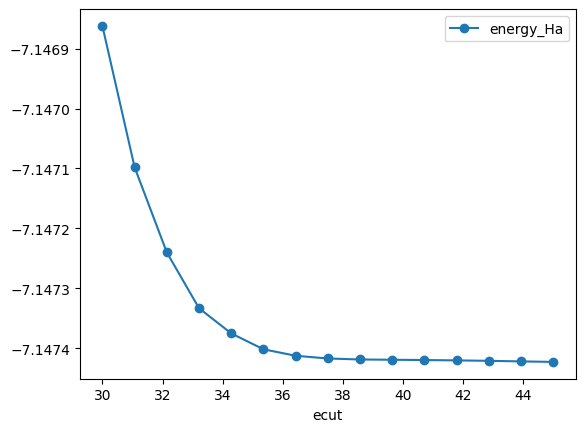

In [17]:
table_ecut.plot(
    x = "ecut",
    y = ["energy_Ha"],
    style = '-o',
    subplots=True,
);

## Results

ecut = 37

# Acell selection

In [19]:
def build_acell_flow():
    inputs = [gs_input(ecut=37, acell=acell) for acell in np.linspace(1, 10, 10)]
    workdir = "flow_acell"
    return flowtk.Flow.from_inputs(workdir, inputs)

flow_acell = build_acell_flow()
flow_acell.make_scheduler().start()

Using scheduler v >= 3.0.0


[Mon Sep 30 00:58:47 2024] Number of launches: 2

Work #0: <Work, node_id=99, workdir=flow_acell/w0>, Finalized=False
+--------+-----------+------------+--------------+------------+---------+-----------------+----------+-----------+
| Task   | Status    | Queue      | MPI|Omp|Gb   | Warn|Com   | Class   | Sub|Rest|Corr   | Time     |   Node_ID |
+========+===========+============+==============+============+=========+=================+==========+===========+
| w0_t0  | Submitted | 6044@local | 1|  1|2.0    | 0|  0      | ScfTask | (1, 0, 0)       | 0:00:00Q |       100 |
+--------+-----------+------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t1  | Submitted | 6046@local | 1|  1|2.0    | 0|  0      | ScfTask | (1, 0, 0)       | 0:00:00Q |       101 |
+--------+-----------+------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t2  | Ready     | None       | 1|  1|2.0    | NA|NA      | ScfTask | (0,

0

In [21]:
robot_acell = abilab.GsrRobot.from_dir("flow_acell")
table_acell = robot_acell.get_dataframe()

In [33]:
table_acell.sort_values(by="a", inplace=True) 
table_acell['energy_Ha'] = table_acell['energy'] * abilab.units.eV_to_Ha

In [34]:
table_acell[["a", "energy_Ha"]]

,a,energy_Ha
w0/t0/outdata/out_GSR.nc,0.458281,14.119637
w0/t1/outdata/out_GSR.nc,0.916562,-4.974110
w0/t2/outdata/out_GSR.nc,1.374843,-6.632106
w0/t3/outdata/out_GSR.nc,1.833124,-6.997702
w0/t4/outdata/out_GSR.nc,2.291405,-7.109940
w0/t5/outdata/out_GSR.nc,2.749685,-7.147415
w0/t6/outdata/out_GSR.nc,3.207966,-7.157736
w0/t7/outdata/out_GSR.nc,3.666247,-7.157211
w0/t8/outdata/out_GSR.nc,4.124528,-7.152342
w0/t9/outdata/out_GSR.nc,4.582809,-7.145997


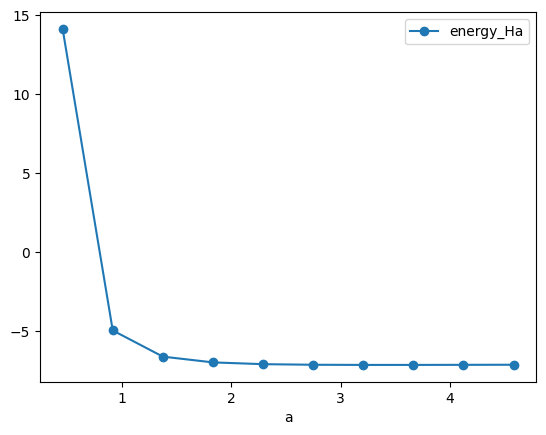

In [35]:
table_acell.plot(
    x = "a",
    y = ["energy_Ha"],
    style = '-o',
    subplots=True,
);

## Relax acell

In [39]:
def build_relax_flow():
    structure = abilab.Structure.from_abivars(
        ntype = 1,
        znucl = 3,
        natom = 1,
        typat = (1),
        acell = (5, 5, 5),
        rprim = [
            -0.5, 0.5, 0.5,
            0.5, -0.5, 0.5,
            0.5, 0.5, -0.5,
        ],
        xred = [
            0.0, 0.0, 0.0,
        ]
    )
    inp = abilab.AbinitInput(
        structure=structure,
        pseudos="pseudos/Li.psp8"
    )
    inp.set_vars(
        ecut = 37,
        tolvrs=1e-9,
        optcell=1,
        ionmov=3,
        ntime=10,
        dilatmx=1.05,
        ecutsm=0.5,
        diemac=12,
        iomode=3,
    )
    inp.set_kmesh(
        ngkpt=(4, 4, 4),     
        shiftk = [
            0.5, 0.5, 0.5,
        ]
    )
    workdir = "flow_relax"
    return flowtk.Flow.from_inputs(workdir, inputs=inp, task_class=flowtk.RelaxTask)

In [42]:
flow_relax = build_relax_flow()
flow_relax.make_scheduler().start()

Using scheduler v >= 3.0.0


[Mon Sep 30 01:32:39 2024] Number of launches: 1

Work #0: <Work, node_id=117, workdir=flow_relax/w0>, Finalized=False
+--------+-----------+------------+--------------+------------+-----------+-----------------+----------+-----------+
| Task   | Status    | Queue      | MPI|Omp|Gb   | Warn|Com   | Class     | Sub|Rest|Corr   | Time     |   Node_ID |
+========+===========+============+==============+============+===========+=================+==========+===========+
| w0_t0  | Submitted | 7123@local | 1|  1|2.0    | 0|  0      | RelaxTask | (1, 0, 0)       | 0:00:00Q |       118 |
+--------+-----------+------------+--------------+------------+-----------+-----------------+----------+-----------+

Fixed 1 AbiCritical error(s)
[Mon Sep 30 01:32:49 2024] Number of launches: 1

Work #0: <Work, node_id=117, workdir=flow_relax/w0>, Finalized=False
+--------+-----------+------------+--------------+------------+-----------+-----------------+----------+-----------+
| Task   | Status    | Queue  

0

In [44]:
hist = abilab.abiopen("flow_relax/w0/t0/outdata/out_HIST.nc")
print(hist)

================================= File Info =================================
Name: out_HIST.nc
Directory: /home/denis/abinit-10.0.7.1-2d3c4/my_study/Li/flow_relax/w0/t0/outdata
Size: 3.77 kB
Access Time: Mon Sep 30 01:33:43 2024
Modification Time: Mon Sep 30 01:33:03 2024
Change Time: Mon Sep 30 01:33:03 2024

============================= Initial Structure =============================
Full Formula (Li1)
Reduced Formula: Li
abc   :   3.310045   3.310045   3.310045
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #  SP      a    b    c  cartesian_forces
---  ----  ---  ---  ---  -----------------------
  0  Li      0    0    0  [-0. -0. -0.] eV ang^-1

Number of relaxation steps performed: 4
============================== Final structure ==============================
Full Formula (Li1)
Reduced Formula: Li
abc   :   3.386156   3.386156   3.386156
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #

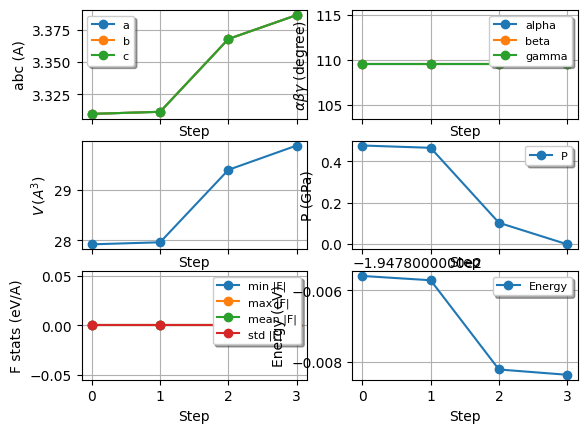

In [45]:
hist.plot();

In [53]:
hist_robot = abilab.HistRobot.from_dir("flow_relax")
hist_table = hist_robot.get_dataframe()
hist_table["final_energy_Ha"] = hist_table["final_energy"] * abilab.units.eV_to_Ha

In [54]:
hist_table[["volume", "a", "final_energy_Ha", "final_pressure", "num_steps"]]

,volume,a,final_energy_Ha,final_pressure,num_steps
w0/t0/outdata/out_HIST.nc,29.888148,3.386156,-7.15834,-0.003445,4


## Results

acell = 7.388823

# Band structure

In [61]:
def build_ebands_flow():
    structure = abilab.Structure.from_abivars(
        ntype = 1,
        znucl = 3,
        natom = 1,
        typat = (1),
        acell = (7.388823, 7.388823, 7.388823),
        rprim = [
            -0.5, 0.5, 0.5,
            0.5, -0.5, 0.5,
            0.5, 0.5, -0.5,
        ],
        xred = [
            0.0, 0.0, 0.0,
        ]
    )
    multi = abilab.MultiDataset(
        structure=structure,
        pseudos="pseudos/Li.psp8",
        ndtset=2
    )
    multi.set_vars(
        ecut = 37,
        diemac=12,
        iomode=3,
    )
    # Dataset 1
    multi[0].set_vars(tolvrs=1e-9)
    multi[0].set_kmesh(
        ngkpt=(4, 4, 4),     
        shiftk = [
            0.5, 0.5, 0.5,
        ]
    )

    # Dataset 2
    multi[1].set_vars(tolwfr=1e-15)
    multi[1].set_kpath(ndivsm=5)

    scf_input, nscf_input = multi.split_datasets()
    
    workdir = "flow_ebands"
    return flowtk.bandstructure_flow(workdir, scf_input=scf_input, nscf_input=nscf_input)

In [62]:
flow_ebands = build_ebands_flow()
flow_ebands.make_scheduler().start()

Using scheduler v >= 3.0.0


[Mon Sep 30 01:57:50 2024] Number of launches: 1

Work #0: <BandStructureWork, node_id=120, workdir=flow_ebands/w0>, Finalized=False
+--------+-------------+------------+--------------+------------+----------+-----------------+----------+-----------+
| Task   | Status      | Queue      | MPI|Omp|Gb   | Warn|Com   | Class    | Sub|Rest|Corr   | Time     |   Node_ID |
+========+=============+============+==============+============+==========+=================+==========+===========+
| w0_t0  | Submitted   | 7902@local | 1|  1|2.0    | NA|NA      | ScfTask  | (1, 0, 0)       | 0:00:00Q |       121 |
+--------+-------------+------------+--------------+------------+----------+-----------------+----------+-----------+
| w0_t1  | Initialized | None       | 1|  1|2.0    | NA|NA      | NscfTask | (0, 0, 0)       | None     |       122 |
+--------+-------------+------------+--------------+------------+----------+-----------------+----------+-----------+


nbdbuf is not specified in input, using

0

In [67]:
with abilab.abiopen("flow_ebands/w0/t1/outdata/out_GSR.nc") as gsr:
    ebands_kpath = gsr.ebands


with abilab.abiopen("flow_ebands/w0/t0/outdata/out_GSR.nc") as gsr:
    ebands_kmesh = gsr.ebands
    
edos = ebands_kmesh.get_edos()

In [68]:
print(ebands_kpath.fermie, edos.fermie)

-47.65026550580056 eV -0.9094973160925017


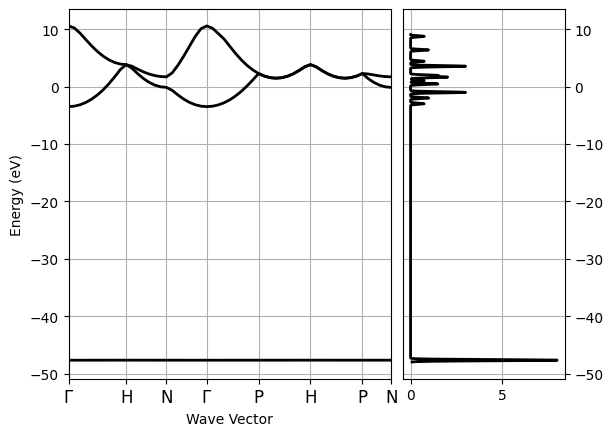

In [69]:
ebands_kpath.plot_with_edos(edos, e0=0);